In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import random
from charts.hist_chart import hist_chart

In [3]:
from schema.constants import Figsize, HistType, Hatch

In [4]:
NUM_OF_POINTS = 100

In [5]:
charts = {
    "data": {"x": [100 * idx * random.random() for idx in range(NUM_OF_POINTS)]}
}

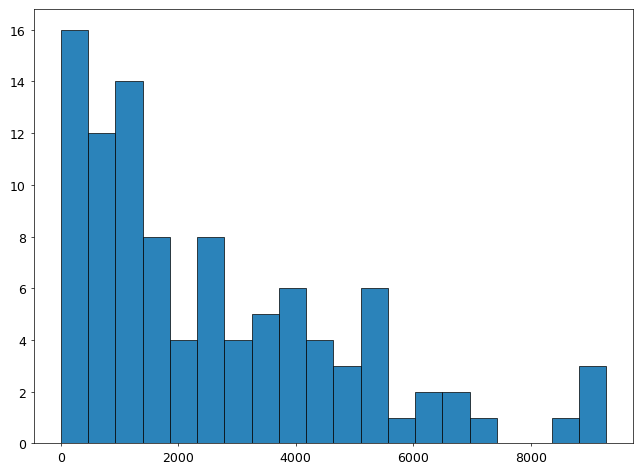

In [6]:
hist_chart(
    {
        "charts": charts,
    }
)

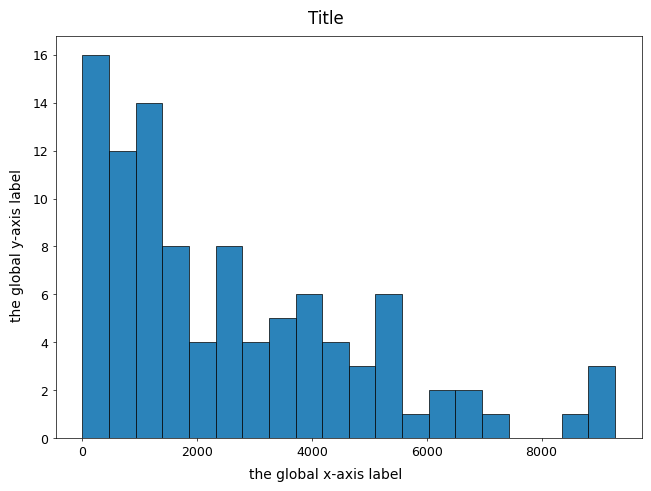

In [7]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

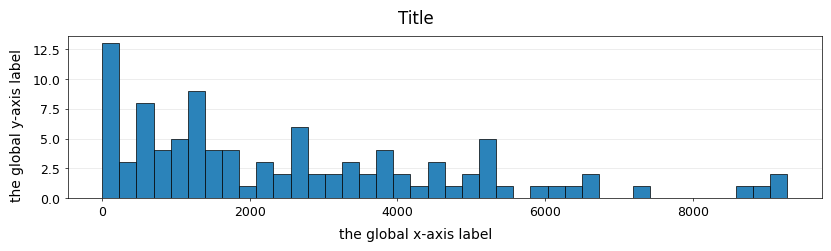

In [8]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
        "num_bins": 40,
    }
)

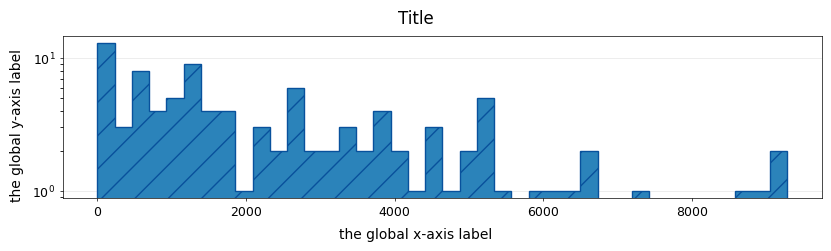

In [9]:
hist_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.hist.hatch": Hatch.DIAGONAL,
                "plot.hist.fill": True,
                "plot.hist.edge.width": 1,
                "plot.hist.edge.color": "#08519c",
                "plot.hist.type": HistType.STEP,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  
        "show_grid": "y",  
        "num_bins": 40,
        "log_scale": True, # use log scale
    }
)

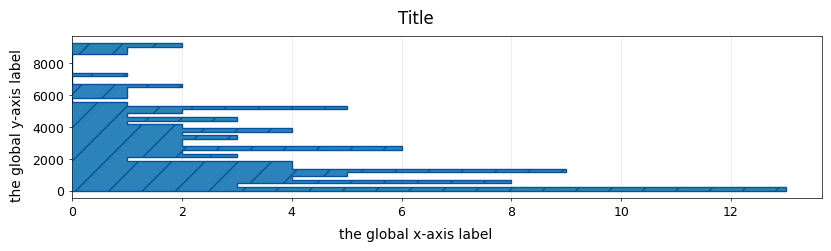

In [10]:
hist_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.hist.hatch": Hatch.DIAGONAL,
                "plot.hist.fill": True,
                "plot.hist.edge.width": 1,
                "plot.hist.edge.color": "#08519c",
                "plot.hist.type": HistType.STEP,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  
        "show_grid": "x",  # change the grid to match the change in orientation
        "num_bins": 40,
        "orientation": "horizontal", # options: # "horizontal", "vertical"
    }
)

In [11]:
charts = [
    {
        "data": {"x": [100 * idx * random.random() for idx in range(NUM_OF_POINTS)]},
        "style": {
            "plot.bar.error.color": "#000000",
        },
        "subtitle": f"Histogram {id}",
    }
    for id in range(2)
]

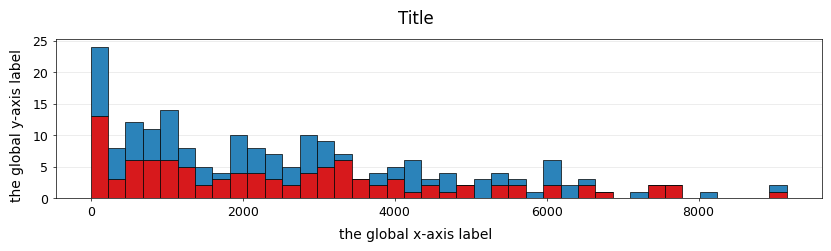

In [12]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
        "num_bins": 40,
    }
)

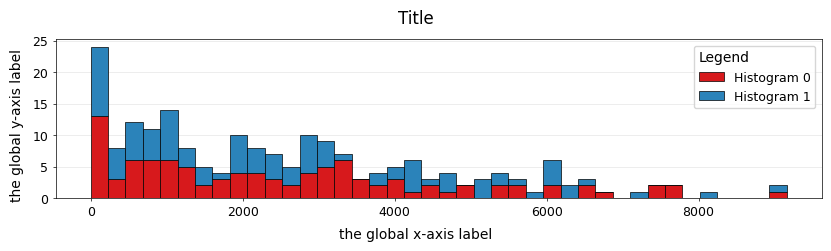

In [13]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y",
        "num_bins": 40,
        "show_legend": True,  # show the legend
        
    }
)

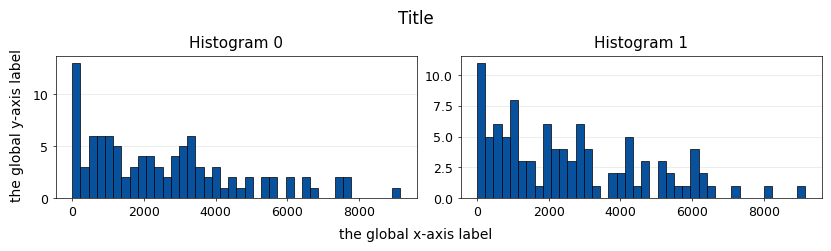

In [14]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "num_bins": 40,
        "show_grid": "y",
        # "show_legend": True, # show_legend is not supported
    }
)

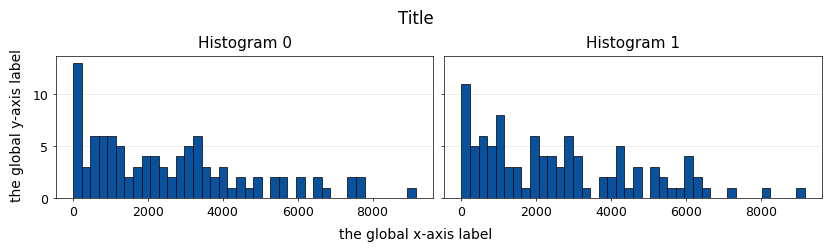

In [15]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "y",
        "num_bins": 40,
    }
)

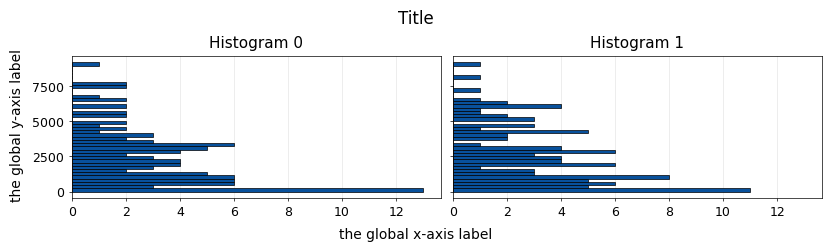

In [16]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "orientation": "horizontal",
    }
)

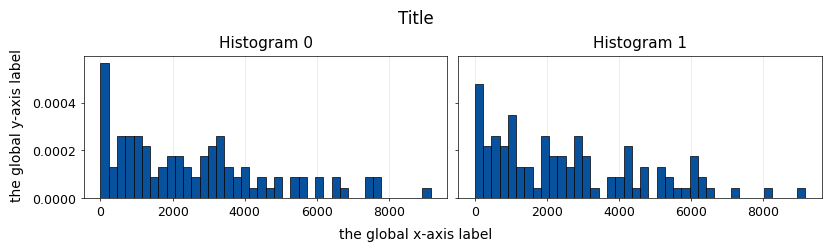

In [17]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
    }
)

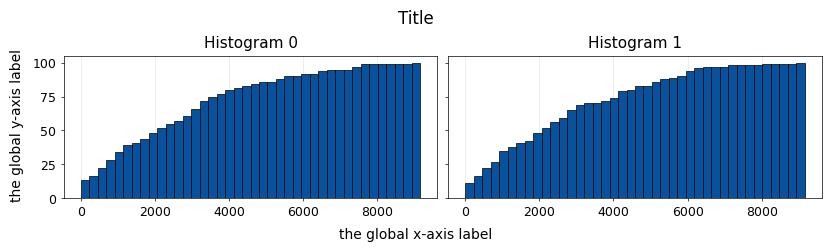

In [18]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_cumulative": True, # shows the cumulative distribution
    }
)

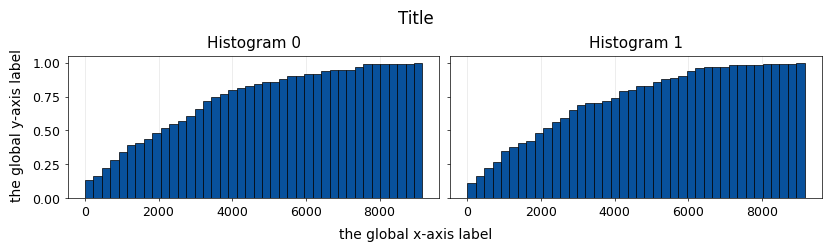

In [19]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
        "show_cumulative": True, # shows the cumulative distribution
    }
)

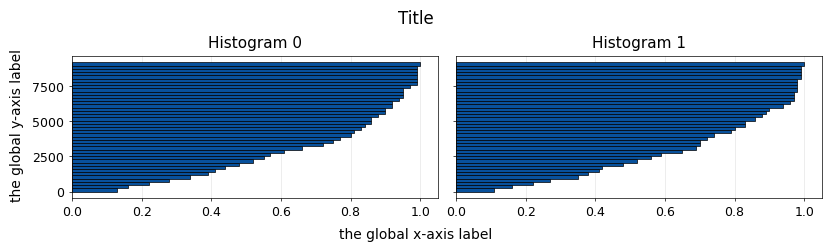

In [20]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
        "show_cumulative": True, # shows the cumulative distribution
        "orientation": "horizontal",
    }
)

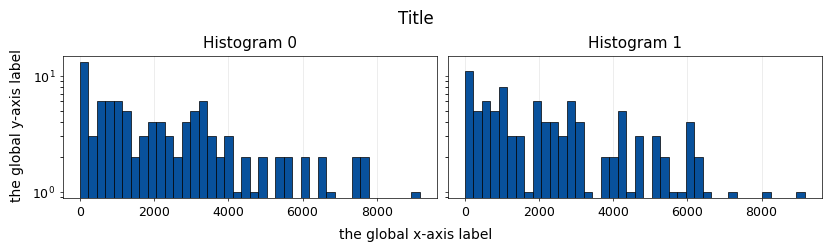

In [21]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "log_scale": True
    }
)